In [1]:
"Hello?"

'Hello?'

In [2]:
##class imbalanced >> when one class is higher %
## handle the class imbalnce the problem

##upsampling
## downsampling 
## smote 

In [1]:
import numpy as np
import pandas as pd

np.random.seed(1)## for reproducibility
no_samples = 1000
class_0_ratio = 0.9
no_of_class_0 =900
no_class_1 = 100

In [6]:
no_of_class_0

900

In [7]:
no_class_1

100

In [9]:
[0]*10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [11]:
len(np.random.normal(0,1,no_of_class_0))

900

In [13]:
class_0 = {'Feature1':np.random.normal(0,1,no_of_class_0),
          'Feature2':np.random.normal(0,1,no_of_class_0),
            'Target': [0]*no_of_class_0}

In [22]:
len(class_0)

3

In [23]:
class_0 = pd.DataFrame(class_0)

In [18]:
class_1 = pd.DataFrame({'Feature1':np.random.normal(3,1,no_class_1),
          'Feature2':np.random.normal(3,1,no_class_1),
            'Target': [1]*no_class_1})

In [19]:
class_1

,Feature1,Feature2,Target
0,2.901181,3.613719,1
1,2.729851,2.917747,1
2,4.745068,2.855780,1
3,2.819442,3.792378,1
4,2.797622,2.697728,1
...,...,...,...
95,2.247285,4.236735,1
96,4.360377,4.116299,1
97,3.386375,3.675240,1
98,3.388515,3.022452,1


In [24]:
df = pd.concat([class_0,class_1]).reset_index(drop = True)


In [25]:
df

,Feature1,Feature2,Target
0,-1.307971,-0.453503,0
1,1.472396,-0.820905,0
2,0.074876,0.940219,0
3,-1.786935,-1.411293,0
4,0.165211,0.884148,0
...,...,...,...
995,2.247285,4.236735,1
996,4.360377,4.116299,1
997,3.386375,3.675240,1
998,3.388515,3.022452,1


In [27]:
df.Target.value_counts()

Target
0    900
1    100
Name: count, dtype: int64

In [31]:
## upsampling

df_minority = df[df.Target == 1]
df_majority = df[df.Target == 0]

In [32]:
df_minority

,Feature1,Feature2,Target
900,2.901181,3.613719,1
901,2.729851,2.917747,1
902,4.745068,2.855780,1
903,2.819442,3.792378,1
904,2.797622,2.697728,1
...,...,...,...
995,2.247285,4.236735,1
996,4.360377,4.116299,1
997,3.386375,3.675240,1
998,3.388515,3.022452,1


In [2]:
from sklearn.utils import resample


In [38]:
!pip install scikit-learn


In [44]:
## replace = true with replacement[1,2,3]>>[1],[2],[1],[3]
df_minority_upsamples = resample(df_minority,replace = True,n_samples = len(df_majority),random_state =1)

In [46]:
df_minority_upsamples.shape

(900, 3)

In [47]:
df_minority_upsamples.head()

,Feature1,Feature2,Target
937,1.357980,1.436963,1
912,3.031925,4.110404,1
972,1.820175,4.590844,1
909,2.810210,2.061396,1
975,2.339504,3.891213,1


In [48]:
df_minority_upsamples = pd.concat([df_majority,df_minority_upsamples])

In [49]:
df_minority_upsamples

,Feature1,Feature2,Target
0,-1.307971,-0.453503,0
1,1.472396,-0.820905,0
2,0.074876,0.940219,0
3,-1.786935,-1.411293,0
4,0.165211,0.884148,0
...,...,...,...
936,4.228505,3.963701,1
998,3.388515,3.022452,1
901,2.729851,2.917747,1
932,3.855587,3.597946,1


In [50]:
df_minority_upsamples.Target.value_counts()

Target
0    900
1    900
Name: count, dtype: int64

In [51]:
## downsampling
df_minority

,Feature1,Feature2,Target
900,2.901181,3.613719,1
901,2.729851,2.917747,1
902,4.745068,2.855780,1
903,2.819442,3.792378,1
904,2.797622,2.697728,1
...,...,...,...
995,2.247285,4.236735,1
996,4.360377,4.116299,1
997,3.386375,3.675240,1
998,3.388515,3.022452,1


In [52]:
df_majority

,Feature1,Feature2,Target
0,-1.307971,-0.453503,0
1,1.472396,-0.820905,0
2,0.074876,0.940219,0
3,-1.786935,-1.411293,0
4,0.165211,0.884148,0
...,...,...,...
895,-1.322762,-1.140488,0
896,0.540306,0.501016,0
897,-0.507257,0.225767,0
898,1.128379,-1.089087,0


In [54]:
df_majority_downsamples = resample(df_majority,replace = False,n_samples=len(df_minority),random_state=1)

In [55]:
df_majority_downsamples

,Feature1,Feature2,Target
860,-1.537535,0.122837,0
880,-0.838450,-1.586623,0
874,-0.771039,-1.448482,0
780,-2.018355,0.502019,0
525,-0.521316,0.452069,0
...,...,...,...
494,1.152007,0.781319,0
255,-0.241664,0.297858,0
672,-0.999110,-0.053589,0
481,-0.080607,-0.644226,0


In [56]:
df_downsampled = pd.concat([df_minority,df_majority_downsamples])

In [57]:
df_downsampled

,Feature1,Feature2,Target
900,2.901181,3.613719,1
901,2.729851,2.917747,1
902,4.745068,2.855780,1
903,2.819442,3.792378,1
904,2.797622,2.697728,1
...,...,...,...
494,1.152007,0.781319,0
255,-0.241664,0.297858,0
672,-0.999110,-0.053589,0
481,-0.080607,-0.644226,0


In [58]:
df_downsampled.Target.value_counts()

Target
1    100
0    100
Name: count, dtype: int64

In [59]:
## SMOTE >> synthetic minority overampling technique

In [4]:
from sklearn.datasets import make_classification

In [5]:
X,Y = make_classification(n_samples = 1000,n_redundant = 0,n_features=2,n_clusters_per_class = 1,weights =[0.90],random_state=1)

In [6]:
X

array([[ 1.53682958, -1.39869399],
       [ 1.55110839,  1.81032905],
       [ 1.29361936,  1.01094607],
       ...,
       [-0.55662536, -0.15983725],
       [ 1.00499902,  0.93628981],
       [ 1.46210987,  1.14497791]], shape=(1000, 2))

In [7]:

Y

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [67]:
len(Y[Y==0])

894

In [8]:
df1 = pd.DataFrame(X,columns = ['f1','f2'])
df2 = pd.DataFrame(Y,columns = ['Target'])
final_df = pd.concat([df1,df2],axis=1)
final_df

,f1,f2,Target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
995,2.210439,2.006772,0
996,1.910941,2.011860,0
997,-0.556625,-0.159837,0
998,1.004999,0.936290,0


In [74]:
final_df.Target.value_counts()

Target
0    894
1    106
Name: count, dtype: int64

In [9]:
import matplotlib.pyplot as plt

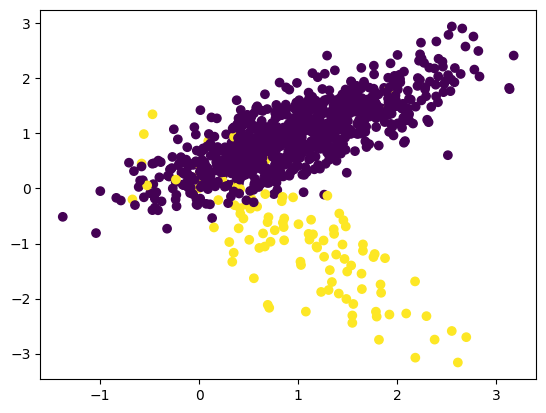

In [10]:
plt.scatter(final_df['f1'],final_df['f2'],c =  final_df["Target"])

In [81]:
!pip install imblearn

In [3]:
from imblearn.over_sampling import SMOTE

In [11]:
oversample = SMOTE()

In [14]:
X,Y = oversample.fit_resample(final_df[['f1','f2']],final_df['Target'])

In [15]:
X.shape

(1788, 2)

In [17]:
Y.shape

(1788,)

In [18]:
 len(Y[Y==0])

894

In [19]:
 len(Y[Y==1])

894

In [20]:
df1 = pd.DataFrame(X,columns = ['f1','f2'])
df2 = pd.DataFrame(Y,columns = ['Target'])
over_sample_df = pd.concat([df1,df2],axis=1)
over_sample_df

,f1,f2,Target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
1783,0.127888,0.153942,1
1784,0.497400,0.159517,1
1785,0.480821,-0.281072,1
1786,1.212938,-1.087301,1


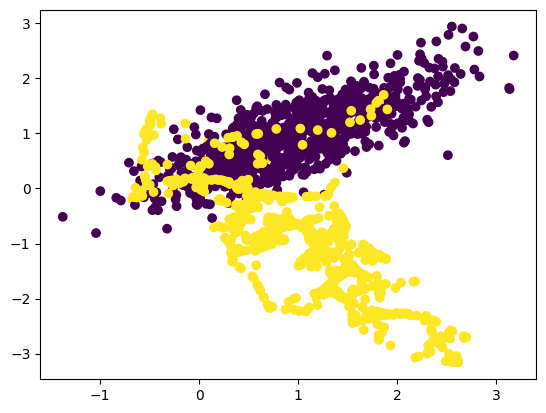

In [22]:
plt.scatter(over_sample_df['f1'],over_sample_df['f2'],c = over_sample_df['Target'])

In [24]:
over_sample_df[over_sample_df.Target == 1]

,f1,f2,Target
0,1.536830,-1.398694,1
8,2.552644,-2.588927,1
14,1.115618,-0.929017,1
17,1.558391,-2.098504,1
20,-0.672512,-0.198716,1
...,...,...,...
1783,0.127888,0.153942,1
1784,0.497400,0.159517,1
1785,0.480821,-0.281072,1
1786,1.212938,-1.087301,1
